In [3]:
from scipy.linalg import dft
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pytz
import seaborn as sns
%matplotlib inline

In [9]:
base_dir = sorted(glob('/Users/carlos/vl/StopWatch/Stanford-University.StopWatch *.xcappdata'))[-1]
print(base_dir)
sessions = sorted(glob(os.path.join(base_dir, 'AppData/Documents/data/session-*.csv')))
motions = sorted(glob(os.path.join(base_dir, 'AppData/Documents/data/motion-*.csv')))
map(os.path.basename, [sessions[-1], motions[-1]])

IndexError: list index out of range

In [4]:
record_idx = -3

session = pd.read_csv(sessions[record_idx], parse_dates=['date'])
print len(session)

178681


In [14]:
import sys
# from https://github.com/MTG/sms-tools
sys.path.append('/Users/carlos/me/sms-tools/software/models')
import stft
import math

In [27]:
mXpX = []
for x in [session.x, session.y, session.z]:
    fs = 50
    M = 301 # 101 # M is number of samples
    w = np.hamming(M)
    N = 2 ** int(math.ceil(math.log(M, 2))) # power of 2 larger than window size
    H = 60 # hop size
    mX, pX = stft.stftAnal(x, w, N, H)
    mXpX.append((mX, pX))

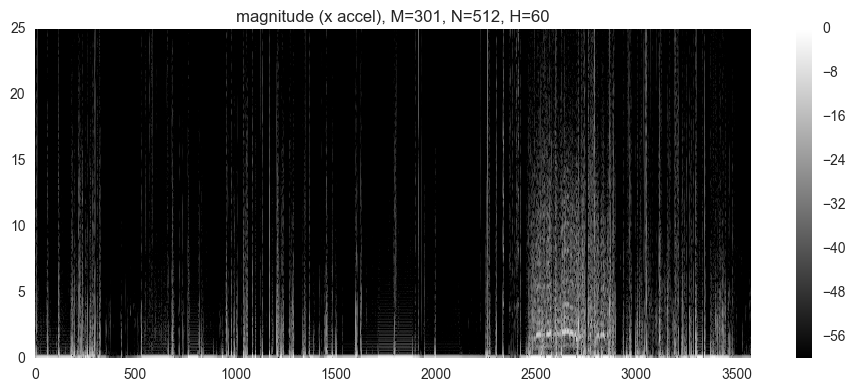

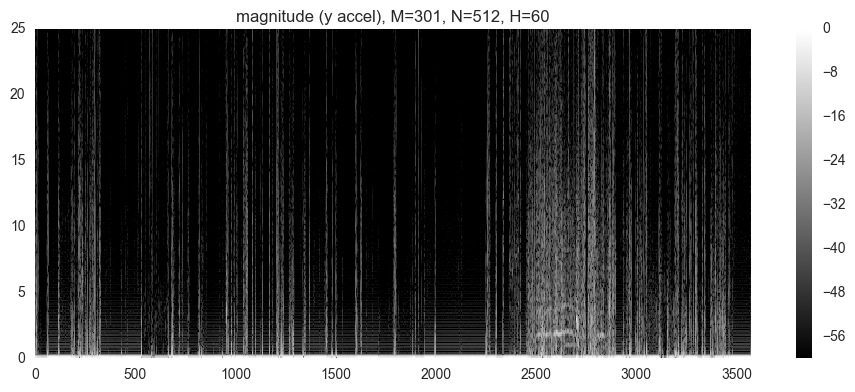

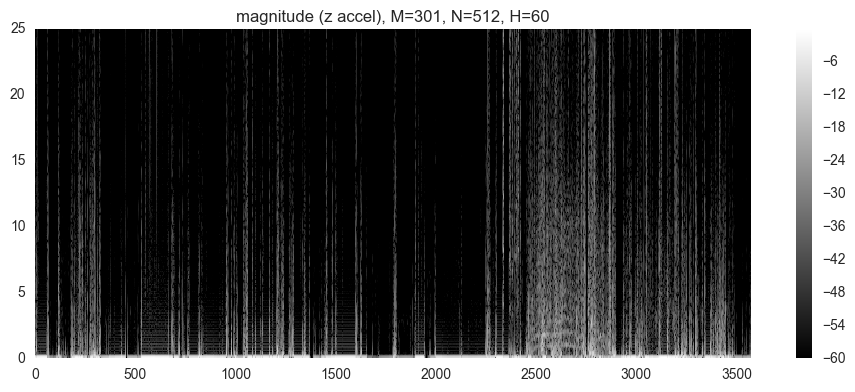

In [44]:
cmap = plt.cm.gray
clip_args = (-60, float('inf'))

for idx, ((mX, pX), label) in enumerate([
    (mXpX[0], 'x accel'),
    (mXpX[1], 'y accel'),
    (mXpX[2], 'z accel'),
]):
    plt.figure(idx, figsize=(9.5, 4)) # should be (9.5, 6) when doing subplot

    mX = np.clip(mX, *clip_args)

    #plt.subplot(211)
    numFrames = int(mX[:,0].size)
    frmTime = H*np.arange(numFrames)/float(fs)                             
    binFreq = np.arange(N/2+1)*float(fs)/N                         
    plt.pcolormesh(frmTime, binFreq, np.transpose(mX), cmap=cmap)
    plt.title('magnitude ({}), M={}, N={}, H={}'.format(label, M, N, H))
    plt.autoscale(tight=True)
    plt.colorbar()

    '''
    plt.subplot(212)
    numFrames = int(pX[:,0].size)
    frmTime = H*np.arange(numFrames)/float(fs)                             
    binFreq = np.arange(N/2+1)*float(fs)/N                         
    plt.pcolormesh(frmTime, binFreq, np.diff(np.transpose(pX),axis=0), cmap=cmap)
    plt.title('phase derivative ({}), M={}, N={}, H={}'.format(label, M, N, H))
    plt.autoscale(tight=True)
    '''

    plt.tight_layout()